In [1]:
!pip install yfinance pandas-datareader

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
data = yf.download("RELIANCE.NS", start="2020-09-26", end="2025-09-06")

/tmp/ipython-input-957855456.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("RELIANCE.NS", start="2020-09-26", end="2025-09-06")
[*********************100%***********************]  1 of 1 completed


In [4]:
print(data.tail())

Price             Close         High          Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                      
2025-09-01  1353.900024  1363.199951  1340.599976  1356.000000    11232238
2025-09-02  1366.500000  1384.500000  1354.500000  1354.800049    11517006
2025-09-03  1372.599976  1376.500000  1360.500000  1369.699951     7847563
2025-09-04  1359.300049  1374.000000  1357.099976  1371.800049    13223177
2025-09-05  1375.000000  1381.000000  1359.300049  1363.000000     5777575


In [5]:
data["Daily_Return"] = data['Close'].pct_change()

In [6]:
print(data.tail())

Price             Close         High          Low         Open      Volume  \
Ticker      RELIANCE.NS  RELIANCE.NS  RELIANCE.NS  RELIANCE.NS RELIANCE.NS   
Date                                                                         
2025-09-01  1353.900024  1363.199951  1340.599976  1356.000000    11232238   
2025-09-02  1366.500000  1384.500000  1354.500000  1354.800049    11517006   
2025-09-03  1372.599976  1376.500000  1360.500000  1369.699951     7847563   
2025-09-04  1359.300049  1374.000000  1357.099976  1371.800049    13223177   
2025-09-05  1375.000000  1381.000000  1359.300049  1363.000000     5777575   

Price      Daily_Return  
Ticker                   
Date                     
2025-09-01    -0.002431  
2025-09-02     0.009306  
2025-09-03     0.004464  
2025-09-04    -0.009690  
2025-09-05     0.011550  


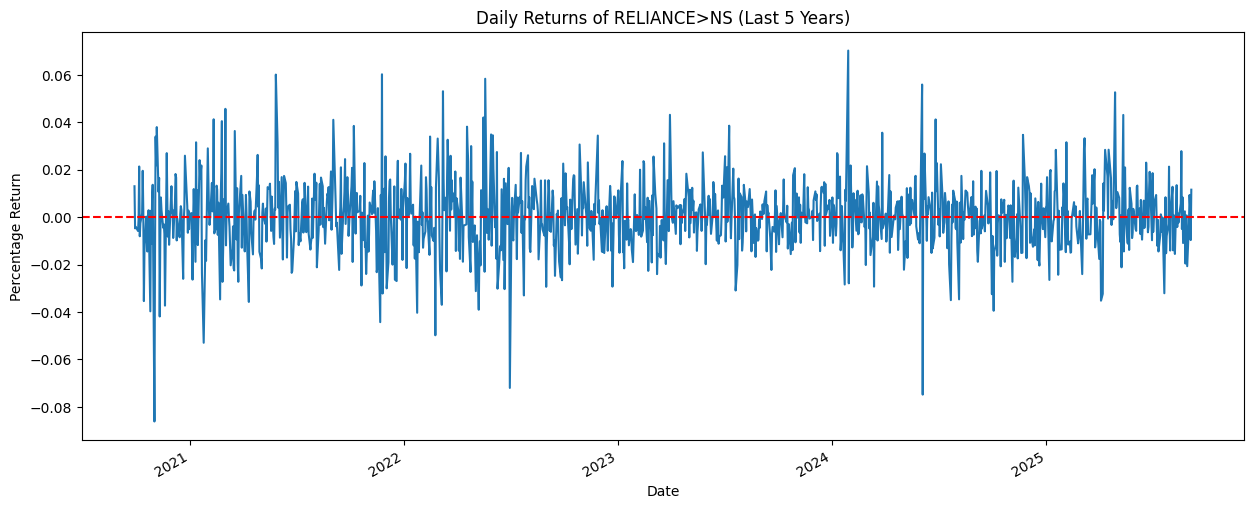

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
data['Daily_Return'].plot()

plt.title("Daily Returns of RELIANCE>NS (Last 5 Years)")
plt.xlabel('Date')
plt.ylabel('Percentage Return')

plt.axhline(0,color='red', linestyle='--')
plt.show()

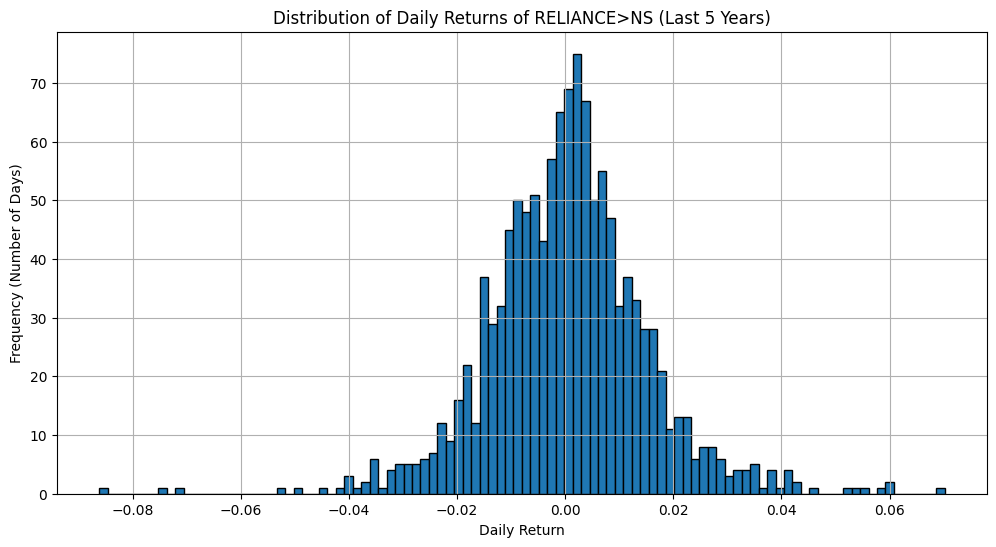

In [8]:
plt.figure(figsize=(12,6))
data['Daily_Return'].hist(bins=100,edgecolor='black')
plt.title("Distribution of Daily Returns of RELIANCE>NS (Last 5 Years)")
plt.xlabel('Daily Return')
plt.ylabel('Frequency (Number of Days)')
plt.show()

In [9]:
VaR_95 = data['Daily_Return'].quantile(0.05)
print(f"The 95% Value at Risk (VaR) is: {VaR_95:.4f}")
print(f"This means that on 95 out of 100 days, we expect the loss to be less than {-VaR_95:.2%}.")
print(f"Conversely, there is a 5% chance the loss on any given day could be worse than {-VaR_95:.2%}.")

The 95% Value at Risk (VaR) is: -0.0223
This means that on 95 out of 100 days, we expect the loss to be less than 2.23%.
Conversely, there is a 5% chance the loss on any given day could be worse than 2.23%.


In [10]:
VaR_99 = data['Daily_Return'].quantile(0.01)
print(f"The 95% VaR was: {VaR_95:.4f} (or {-VaR_95:.2%})")
print(f"The 99% VaR is: {VaR_99:.4f} (or {-VaR_99:.2%})")

The 95% VaR was: -0.0223 (or 2.23%)
The 99% VaR is: -0.0367 (or 3.67%)


In [11]:
tail_losses = data[data['Daily_Return'] < VaR_95]
ES_95 = tail_losses['Daily_Return'].mean()
print(f"The 95% VaR told us the loss would not be worse than {-VaR_95:.2%}.")
print(f"The 95% Expected Shortfall tells us that on those worst 5% of days, the AVERAGE loss was actually {-ES_95:.2%}.")

The 95% VaR told us the loss would not be worse than 2.23%.
The 95% Expected Shortfall tells us that on those worst 5% of days, the AVERAGE loss was actually 3.25%.


In [12]:
data1 = yf.download("TCS.NS", start="2020-09-26", end="2025-09-06")

/tmp/ipython-input-10063411.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download("TCS.NS", start="2020-09-26", end="2025-09-06")
[*********************100%***********************]  1 of 1 completed


In [13]:
print(data1.tail())

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2025-09-01  3112.600098  3131.100098  3090.000000  3090.000000  1246862
2025-09-02  3111.500000  3155.000000  3103.100098  3121.100098  2185229
2025-09-03  3097.500000  3141.899902  3088.000000  3129.899902  1799774
2025-09-04  3095.699951  3118.000000  3090.800049  3116.000000  1481391
2025-09-05  3048.300049  3103.399902  3028.600098  3097.100098  2802055


In [14]:
data1['Daily_Return'] = data1['Close'].pct_change()

In [15]:
data.tail()

Price,Close,High,Low,Open,Volume,Daily_Return
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,
Date,,,,,,
2025-09-01,1353.900024,1363.199951,1340.599976,1356.000000,11232238,-0.002431
2025-09-02,1366.500000,1384.500000,1354.500000,1354.800049,11517006,0.009306
2025-09-03,1372.599976,1376.500000,1360.500000,1369.699951,7847563,0.004464
2025-09-04,1359.300049,1374.000000,1357.099976,1371.800049,13223177,-0.009690
2025-09-05,1375.000000,1381.000000,1359.300049,1363.000000,5777575,0.011550


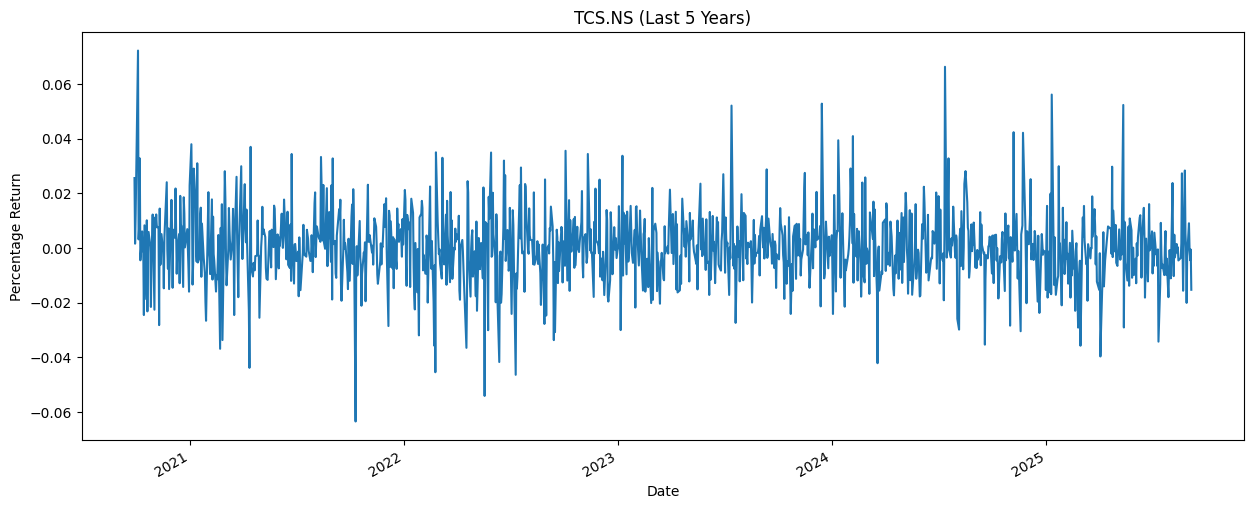

In [16]:
plt.figure(figsize=(15,6))
data1['Daily_Return'].plot(label='TCS')
plt.title("TCS.NS (Last 5 Years)")
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.show()

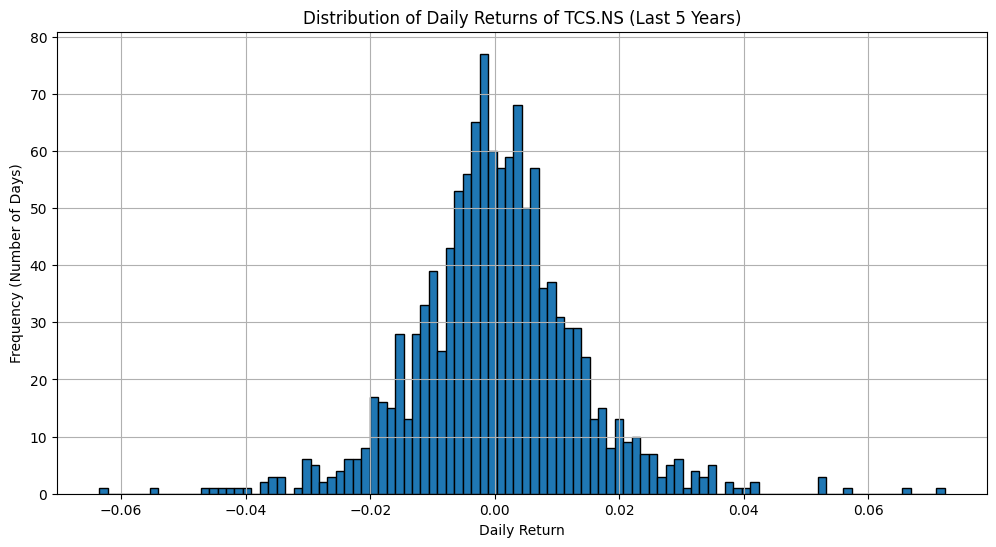

In [17]:
plt.figure(figsize=(12,6))
data1['Daily_Return'].hist(bins=100,edgecolor='black')
plt.title("Distribution of Daily Returns of TCS.NS (Last 5 Years)")
plt.xlabel('Daily Return')
plt.ylabel('Frequency (Number of Days)')
plt.show()

In [18]:
VaR_95_TCS = data1['Daily_Return'].quantile(0.05)
print(f"The 95% Value at Risk (VaR) is: {VaR_95_TCS:.4f}")

The 95% Value at Risk (VaR) is: -0.0198


In [26]:
tail_losses1 = data1[data1['Daily_Return'] < VaR_95_TCS]
ES_95_TCS = tail_losses1['Daily_Return'].mean()
print(f"The 95% Expected Shortfall tells us that on those worst 5% of days, the AVERAGE loss was actually {-ES_95_TCS:.2%}.")

The 95% Expected Shortfall tells us that on those worst 5% of days, the AVERAGE loss was actually 2.88%.


In [27]:
data2 = yf.download('^NSEI', start='2020-09-26', end='2025-09-06')
data2

/tmp/ipython-input-2779497108.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download('^NSEI', start='2020-09-26', end='2025-09-06')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2020-09-28,11227.549805,11239.349609,11099.849609,11140.849609,472800
2020-09-29,11222.400391,11305.400391,11181.000000,11288.599609,498300
2020-09-30,11247.549805,11295.400391,11184.549805,11244.450195,499300
2020-10-01,11416.950195,11428.599609,11347.049805,11364.450195,447700
2020-10-05,11503.349609,11578.049805,11452.299805,11487.799805,530600
...,...,...,...,...,...
2025-09-01,24625.050781,24635.599609,24432.699219,24432.699219,229300
2025-09-02,24579.599609,24756.099609,24522.349609,24653.000000,271600


In [28]:
data2['Daily_Return'] = data2['Close'].pct_change()
data2.tail()

Price,Close,High,Low,Open,Volume,Daily_Return
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,
Date,,,,,,
2025-09-01,24625.050781,24635.599609,24432.699219,24432.699219,229300,0.008114
2025-09-02,24579.599609,24756.099609,24522.349609,24653.000000,271600,-0.001846
2025-09-03,24715.050781,24737.050781,24533.199219,24616.500000,340300,0.005511
2025-09-04,24734.300781,24980.750000,24708.199219,24980.750000,314100,0.000779
2025-09-05,24741.000000,24832.349609,24621.599609,24818.849609,210100,0.000271


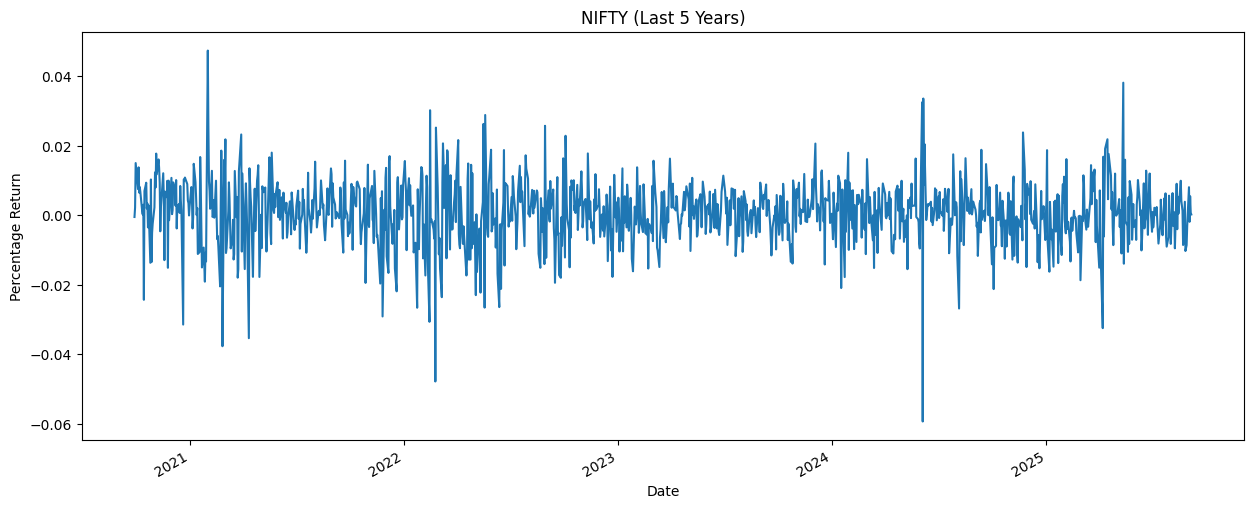

In [29]:
plt.figure(figsize=(15,6))
data2['Daily_Return'].plot(label='NIFTY')
plt.title("NIFTY (Last 5 Years)")
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.show()

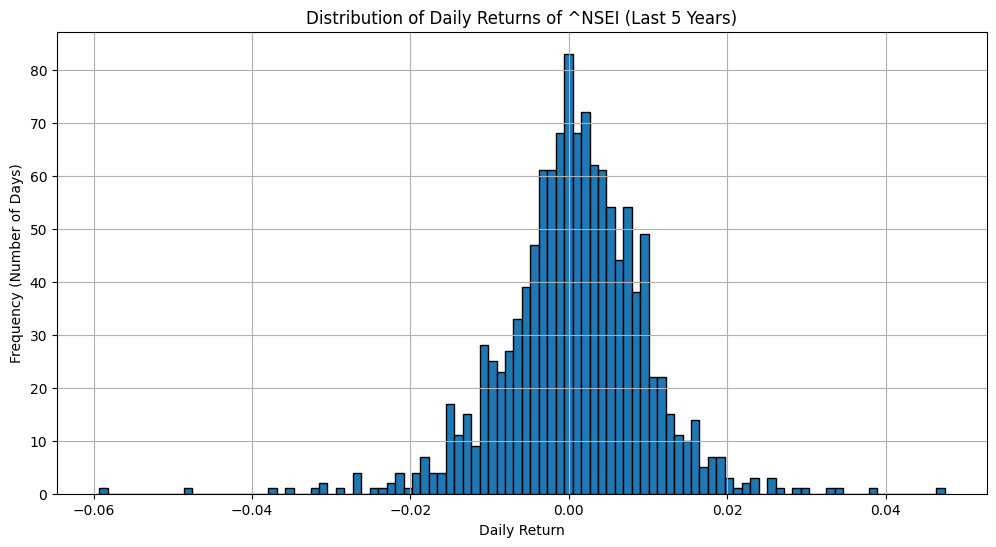

In [30]:
plt.figure(figsize=(12,6))
data2['Daily_Return'].hist(bins=100,edgecolor='black')
plt.title("Distribution of Daily Returns of ^NSEI (Last 5 Years)")
plt.xlabel('Daily Return')
plt.ylabel('Frequency (Number of Days)')
plt.show()

In [31]:
var_95_NSEI = data2['Daily_Return'].quantile(0.05)
print(f"The 95% Value at Risk (VaR) is: {var_95_NSEI:.4f}")
tail_losses2 = data2[data2['Daily_Return'] < var_95_NSEI]
ES_95_NSEI = tail_losses["Daily_Return"].mean()
print(f"The 95% Expected Shortfall tells us that on those worst 5% of days, the AVERAGE loss was actually {-ES_95_NSEI:.2%}.")

The 95% Value at Risk (VaR) is: -0.0139
The 95% Expected Shortfall tells us that on those worst 5% of days, the AVERAGE loss was actually 3.25%.
